# <center> Лабораторна робота №4.</center><center>Кластеризацiя засобами бiблiотеки Scikit-Learn Python</center>

### <center> Робота з другим набором даних </center>

<i>*У наборі даних замість запропонованих 500 000 прикладів використовується 200 000 через велику навантаженість на процесор.*</i>

In [1]:
#імпортуємо усі модулі, які будемо використовувати надалі

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering

### 1. Графічне представлення даних

In [16]:
X, y = make_blobs(n_samples=200000 , n_features=2,
                    centers=4,
                    cluster_std=1,
                    center_box=(-10.0, 10.0) ,
                    shuffle=True ,
                    random_state=1)

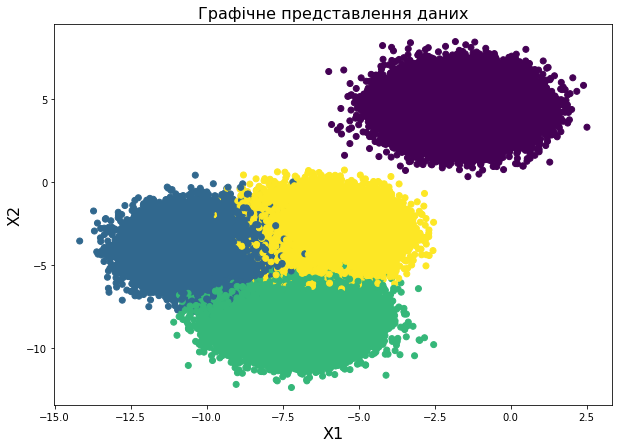

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Графічне представлення даних', size=16)
plt.xlabel('X1', size=16)
plt.ylabel('X2', size=16)
plt.show()

### 2,3. Побудова моделі кластеризації

In [18]:
start_time = time.time()
sc_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', eigen_solver = 'lobpcg').fit(X)
end_time = time.time()

### 4. Графічне представлення розбиття на кластери

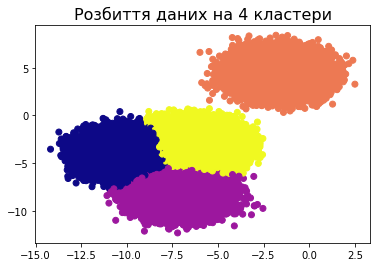

In [19]:
labels = sc_model.labels_
plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma')
plt.title('Розбиття даних на 4 кластери',size=16)
plt.show()

### 5. Розрахунок часу кластеризації

In [20]:
print("Час на виконання процесу кластеризації для даного набору даних:",
      round((end_time-start_time),2), "секунд.")

Час на виконання процесу кластеризації для даного набору даних: 100.85 секунд.


### 6. Побудова альтернативних моделей

In [21]:
# перші дві альтернативні моделі матимуть різні значення кластерів

sc_3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', eigen_solver='lobpcg').fit(X)

sc_5 = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', eigen_solver='lobpcg').fit(X)

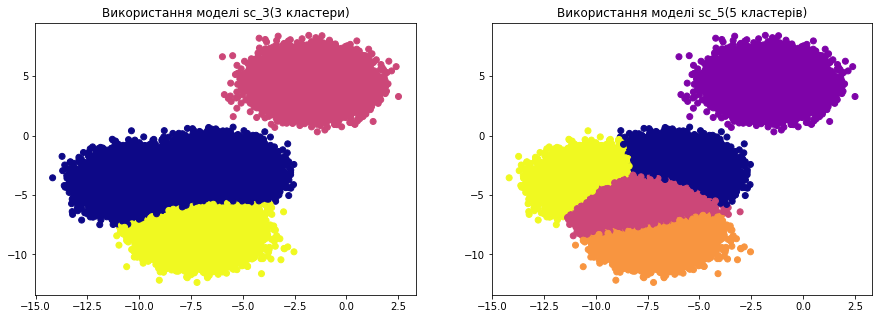

In [22]:
labels_3 = sc_3.labels_
labels_5 = sc_5.labels_
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(X[:,0], X[:,1], c=labels_3, cmap='plasma')
ax[1].scatter(X[:,0], X[:,1], c=labels_5, cmap='plasma')
ax[0].set_title('Використання моделі sc_3(3 кластери)')
ax[1].set_title('Використання моделі sc_5(5 кластерів)')
plt.show()

In [23]:
print("Результати метрик якості для альтернативної моделі sc_3:")
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_3))
print("Silhouette Score:",silhouette_score(X, labels_3))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_3))

print("\n\nРезультати метрик якості для альтернативної моделі sc_5:")
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_5))
print("Silhouette Score:",silhouette_score(X, labels_5))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_5))

Результати метрик якості для альтернативної моделі sc_3:
Davies-Bouldin Score: 0.5930892005795049
Silhouette Score: 0.5897167407382177
Adjusted Rand Score: 0.7011264511594208


Результати метрик якості для альтернативної моделі sc_5:
Davies-Bouldin Score: 0.7930286295324182
Silhouette Score: 0.48762901393456365
Adjusted Rand Score: 0.71165869907473


In [36]:
pip install pyamg

Note: you may need to restart the kernel to use updated packages.


In [24]:
# інша альтернативна модель, в якій змінені значення параметрів

start_2 = time.time()
sc_000 = SpectralClustering(n_clusters=4,
                            affinity='nearest_neighbors',
                            eigen_solver = 'amg',
                            assign_labels='cluster_qr',
                            random_state = 25,
                            n_neighbors = 15).fit(X)
end_2 = time.time()

In [25]:
labels_000 = sc_000.labels_

In [26]:
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_000))
print("Silhouette Score:",silhouette_score(X, labels_000))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_000))
print("Work time:", round((end_2 - start_2), 2), "sec")

Davies-Bouldin Score: 0.5101804357017221
Silhouette Score: 0.6331127275426236
Adjusted Rand Score: 0.9511489511379222
Work time: 10.59 sec


### 7. Розрахунок метрик якості кластеризації

In [27]:
from sklearn.metrics import davies_bouldin_score
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels))

from sklearn.metrics import silhouette_score
print("Silhouette Score:",silhouette_score(X, labels))

from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand Score:",adjusted_rand_score(y, labels))

Davies-Bouldin Score: 0.5101479110865991
Silhouette Score: 0.6331001201645078
Adjusted Rand Score: 0.951228527790912


### 8. Аналіз результатів кластеризації

<font size="4"><center><i>Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?</i><center></font>

In [28]:
# видалимо 5% даних

df = pd.DataFrame(dict(X1=X[:, 0], X2=X[:, 1], y=y))
new_df = df
new_df

,X1,X2,y
0,-6.933886,-7.699299,2
1,-3.343655,5.672643,0
2,-6.948627,-3.651696,3
3,-1.695841,3.574095,0
4,-5.825665,-3.234566,3
...,...,...,...
199995,-1.665223,4.009049,0
199996,-11.136484,-4.870931,1
199997,-6.022815,-3.600585,3
199998,-11.357846,-2.475692,1


In [29]:
rand_arr = np.random.randint(200000, size=10000)
new_df = new_df.drop(labels=rand_arr, axis=0)

In [30]:
X5 = new_df[['X1','X2']].to_numpy()

In [31]:
y5 = new_df['y'].to_numpy()

In [33]:
sc_5 = SpectralClustering(n_clusters = 4, affinity = 'nearest_neighbors', eigen_solver='amg').fit(X5)

In [34]:
labels_5 = sc_5.labels_

In [35]:
print('Davies-Bouldin Score:',davies_bouldin_score(X5, labels_5))
print("Silhouette Score:",silhouette_score(X5, labels_5))
print("Adjusted Rand Score:",adjusted_rand_score(y5, labels_5))

Davies-Bouldin Score: 0.510119173921336
Silhouette Score: 0.6331578416146654
Adjusted Rand Score: 0.951298873175916


In [36]:
# видалимо 15% даних

rand_arr_15 = np.random.randint(200000, size=30000)
df_15 = df
df_15 = df_15.drop(labels=rand_arr_15, axis=0)
X_15 = df_15[['X1','X2']].to_numpy()
y_15 = df_15['y'].to_numpy()

In [38]:
sc_15 = SpectralClustering(n_clusters = 4, affinity='nearest_neighbors', eigen_solver='amg').fit(X_15)

In [39]:
labels_15 = sc_15.labels_

In [40]:
print('Davies-Bouldin Score:',davies_bouldin_score(X_15, labels_15))
print("Silhouette Score:",silhouette_score(X_15, labels_15))
print("Adjusted Rand Score:",adjusted_rand_score(y_15, labels_15))

Davies-Bouldin Score: 0.5098489105442988
Silhouette Score: 0.6331161885529255
Adjusted Rand Score: 0.9516011307103976


In [41]:
# видалимо 35% даних

rand_arr_35 = np.random.randint(200000, size=7000)
df_35 = df
df_35 = df_35.drop(labels=rand_arr_35, axis=0)
X_35 = df_35[['X1','X2']].to_numpy()
y_35 = df_35['y'].to_numpy()

In [43]:
sc_35 = SpectralClustering(n_clusters = 4, affinity='nearest_neighbors', eigen_solver='amg').fit(X_35)

In [44]:
labels_35 = sc_35.labels_

In [45]:
print('Davies-Bouldin Score:',davies_bouldin_score(X_35, labels_35))
print("Silhouette Score:",silhouette_score(X_35, labels_35))
print("Adjusted Rand Score:",adjusted_rand_score(y_35, labels_35))

Davies-Bouldin Score: 0.5098398853214295
Silhouette Score: 0.6332193730050101
Adjusted Rand Score: 0.9512532730989498


Отже, у даному пункті ми видаляли різну кількість даних: починаючи з 5% і закінчуючи 35% даних. Для оновлених даних побудували окрему модель та знайшли результати значень метрик якості кластеризації. Порівнюючи усі отримані результати для кожного такого набору даних між собою та між результати головної моделі, ми помітимо, що значення однакові(до 2 знаків після коми включно). Графічно побудувавши результати кластеризації, можна пересвідчитись у стабільності розбиття. 

<b>Отже, розбиття є стабільним після видалення деяких даних.</b>

### 9, 10. Порівняння моделей, висновки та вибір найкращої моделі.

В результаті роботи з набором даних make_blobs() для реалізації кластеризації мною було побудувано 5 моделей.
- основна модель;
- 2 альтернативні моделі з різними значеннями кількості кластерів;
- 1 альтернативна модель з різними значеннями параметрів моделі.
Для кожної з моделей був знайдений час роботи, а також розраховано результати значень метрик якості.
Почнемо з останнього: порівнюючи усі 5 моделей та їхні відповідні значення метрик, ми бачимо, що
для моделей, які розбивали дані на 3 і 5 кластерів відповідно, прослідковуються найгірші значення метрик якості( davies_bouldin_score). Це цілком виглядає логічним. Природнє розбиття цього набору даних вказує на 4 кластери, а не на меншу чи більшу кількість. Чому інші дві метрики дали "непоганий" результат - було пояснено у файлі Moons_Spectral_Clustering.
Але тепер розглянемо час роботи кожної з моделей.
Модель sc, sc_3, sc_5: ~ 100 секунд;
Модель sc_000: ~ 11 секунд.
Переваги застосування останньої моделі досить помітні.

<b>За найкращу модель доцільно взяти sc_000.</b>



<i>Але ще раз зауважу: додатково варто перевірити роботу цієї моделі на даних з більшою кількістю прикладів, аби впевнитись, що
модель буде працювати стабільно. У негативному випадку варто застосувати основну модель sc.</i>